<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/mobilenetssdwithprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4084, done.
remote: Counting objects: 100% (4084/4084), done.
remote: Compressing objects: 100% (3076/3076), done.
remote: Total 4084 (delta 1188), reused 2898 (delta 948), pack-reused 0
Receiving objects: 100% (4084/4084), 44.61 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (1188/1188), done.


In [3]:

%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .


Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━

In [4]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2024-03-09 07:01:13.176551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 07:01:13.176613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 07:01:13.177763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 07:01:14.146702: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2024-03-09 07:01:18.175930: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting beca

In [5]:
! pip install kaggle

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
! mkdir ~/.kaggle

In [8]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download gpiosenka/100-bird-species

100% 1.95G/1.96G [00:21<00:00, 117MB/s]
100% 1.96G/1.96G [00:21<00:00, 98.2MB/s]


In [11]:
import zipfile

zip_file_path = "/content/100-bird-species.zip"

extract_to_directory = "/content/bird_species_data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (160, 160)
BATCH_SIZE = 32

train_dir = '/content/bird_species_data/train'
valid_dir = '/content/bird_species_data/valid'
test_dir=   '/content/bird_species_data/test'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("validdation images:")
valid_data = train_datagen.flow_from_directory(valid_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 84635 images belonging to 525 classes.
validdation images:
Found 2625 images belonging to 525 classes.


In [13]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=d988c0d2c63596c09384d9837c2126e6974858b3995c669f6c66b139c5bc1d6e
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [14]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (160, 160)
BATCH_SIZE = 32

train_dir = '/content/bird_species_data/train'
valid_dir = '/content/bird_species_data/valid'
test_dir=   '/content/bird_species_data/test'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("validdation images:")
valid_data = train_datagen.flow_from_directory(valid_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training images:
Found 84635 images belonging to 525 classes.
validdation images:
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [15]:
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [16]:
from tensorflow.keras import layers, Model

In [17]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(525, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 [==============================] - 0s 0us/step


In [18]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=valid_data)

Epoch 1/10
2645/2645 [==============================] - 269s 89ms/step - loss: 2.2423 - accuracy: 0.4868 - val_loss: 12.0829 - val_accuracy: 0.1010
Epoch 2/10
2645/2645 [==============================] - 240s 91ms/step - loss: 0.9626 - accuracy: 0.7459 - val_loss: 3.6811 - val_accuracy: 0.3882
Epoch 3/10
2645/2645 [==============================] - 236s 89ms/step - loss: 0.7099 - accuracy: 0.8068 - val_loss: 3.0585 - val_accuracy: 0.4792
Epoch 4/10
2645/2645 [==============================] - 238s 90ms/step - loss: 0.5709 - accuracy: 0.8419 - val_loss: 1.7953 - val_accuracy: 0.5966
Epoch 5/10
2645/2645 [==============================] - 236s 89ms/step - loss: 0.4781 - accuracy: 0.8648 - val_loss: 1.1776 - val_accuracy: 0.7246
Epoch 6/10
2645/2645 [==============================] - 235s 89ms/step - loss: 0.4071 - accuracy: 0.8829 - val_loss: 0.7171 - val_accuracy: 0.8240
Epoch 7/10
2645/2645 [==============================] - 240s 91ms/step - loss: 0.3581 - accuracy: 0.8958 - val_loss: 

In [20]:
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Found 2625 images belonging to 525 classes.


In [21]:
model.evaluate(test_data)

83/83 [==============================] - 4s 50ms/step - loss: 0.4722 - accuracy: 0.8773


[0.4721750319004059, 0.8773333430290222]

In [25]:
import pandas as pd


bird_csv = "/content/bird_species_data/birds.csv"
birds_df = pd.read_csv(bird_csv)


class_labels = birds_df["labels"].tolist()


class_names = [str(label) for label in class_labels]


In [26]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
test_data_gen = ImageDataGenerator(rescale=1. / 255)
test_data = test_data_gen.flow_from_directory(test_dir, target_size=IMAGE_SHAPE, batch_size=BATCH_SIZE, class_mode="categorical")


Found 2625 images belonging to 525 classes.


In [28]:
batch_images, batch_labels = next(test_data)


In [29]:
num_images_to_predict = 5
selected_images = batch_images[:num_images_to_predict]


In [31]:
def make_predictions(images):
    return model.predict(images)

In [32]:
predictions = model.predict(selected_images)


1/1 [==============================] - 0s 24ms/step


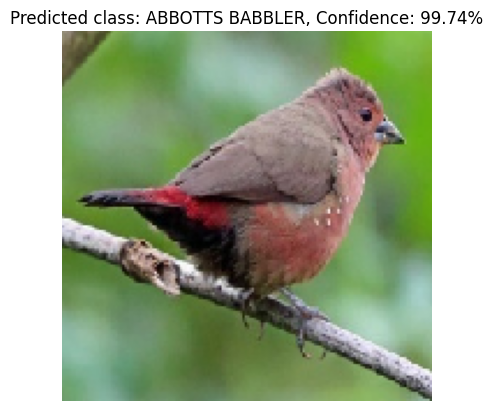

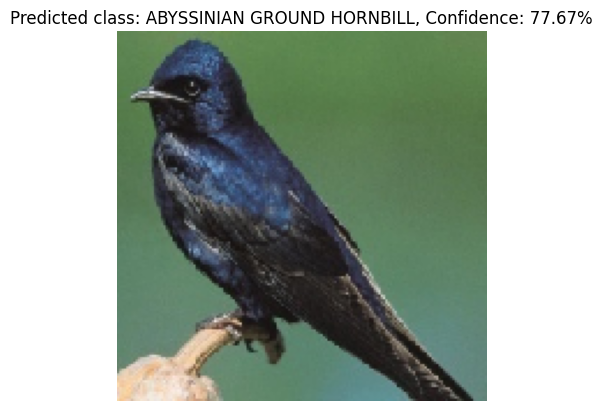

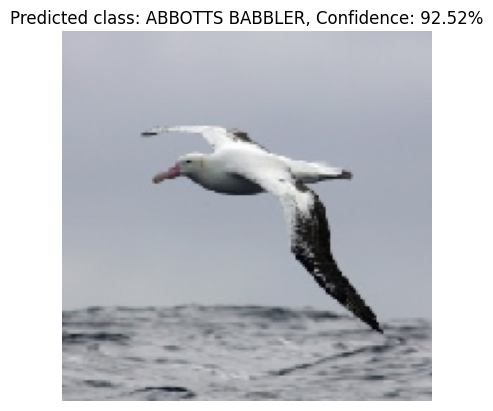

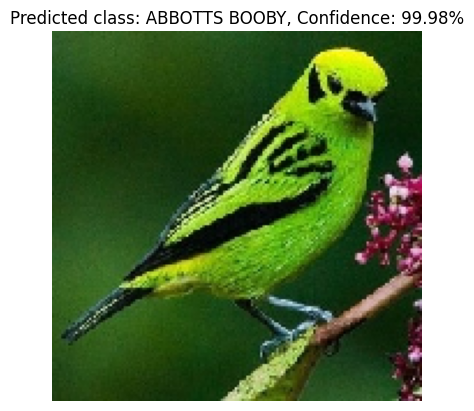

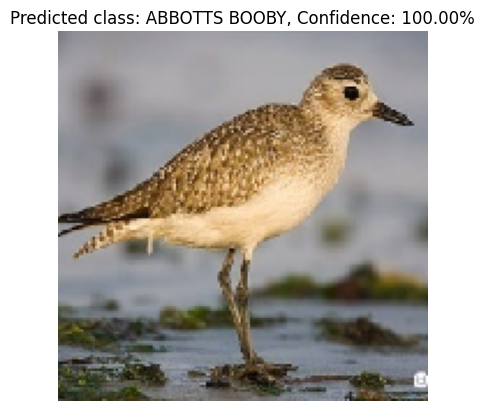

In [37]:
for i, pred in enumerate(predictions):
    predicted_class_index = np.argmax(pred)
    predicted_class = class_names[predicted_class_index]
    confidence = pred[predicted_class_index] * 100

    plt.imshow(selected_images[i])
    plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()


In [36]:
unique_class_labels = set(class_labels)

# Print unique class labels
for label in unique_class_labels:
    print(label)

ASIAN GREEN BEE EATER
COMMON LOON
ABYSSINIAN GROUND HORNBILL
BLACK THROATED BUSHTIT
GREATER PRAIRIE CHICKEN
CHUCAO TAPACULO
TASMANIAN HEN
AFRICAN CROWNED CRANE
ROSEATE SPOONBILL
EUROPEAN TURTLE DOVE
INLAND DOTTEREL
VEERY
ASIAN CRESTED IBIS
JACK SNIPE
HAMERKOP
BLACK SKIMMER
ZEBRA DOVE
CAPE MAY WARBLER
EASTERN YELLOW ROBIN
KILLDEAR
FIERY MINIVET
JABIRU
SCARLET MACAW
BULWERS PHEASANT
ANDEAN LAPWING
FIORDLAND PENGUIN
ALBERTS TOWHEE
DOWNY WOODPECKER
RED BILLED TROPICBIRD
MASKED LAPWING
BARN SWALLOW
TURKEY VULTURE
IVORY BILLED ARACARI
PEACOCK
INCA TERN
CAPUCHINBIRD
BEARDED BELLBIRD
WOOD DUCK
OYSTER CATCHER
PEREGRINE FALCON
BLACK VULTURE
BLUE HERON
HORNED GUAN
MOURNING DOVE
ANTILLEAN EUPHONIA
LONG-EARED OWL
RED FACED CORMORANT
SAYS PHOEBE
CRESTED SHRIKETIT
CHINESE POND HERON
HIMALAYAN BLUETAIL
GILA WOODPECKER
SUNBITTERN
PLUSH CRESTED JAY
GRAY PARTRIDGE
AUSTRAL CANASTERO
ROSE BREASTED COCKATOO
LESSER ADJUTANT
RED HEADED DUCK
EGYPTIAN GOOSE
BROWN THRASHER
PURPLE SWAMPHEN
COPPERY TAILED COUCAL
E

#Creating the frozen graph

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import convert_to_constants
# Convert the Keras model to a TensorFlow graph
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()
